In [1]:
%matplotlib inline
import numpy as np
import numpy.random as npr
import pymc3 as pm
import matplotlib.pyplot as plt

In [2]:
import theano
tmp = theano.config.blas.ldflags
theano.config.blas.ldflags = '-L/Users/bara947/.local/intelpython3/envs/u18fest_env/lib -lmkl_rt -lpthread -lm -lm -Wl'

In [3]:
npr.seed(0)

In [4]:
x1 = np.array([1300, 1300, 1300, 1300, 1300, 1300, 1200, 1200, 1200, 1200, 1200, 1200, 1100, 1100, 1100, 1100])
x2 = np.array([7.5, 9.0, 11.0, 13.5, 17.0, 23.0, 5.3, 7.5, 11.0, 13.5, 17.0, 23.0, 5.3, 7.5, 11.0, 17.0])
x3 = np.array([0.0120, 0.0120, 0.0115, 0.0130, 0.0135, 0.0120, 0.0400, 0.0380, 0.0320, 0.0260, 0.0340, 0.0410, 0.0840, 0.0980, 0.0920, 0.0860])
yobs = np.array([49.0, 50.2, 50.5, 48.5, 47.5, 44.5, 28.0, 31.5, 34.5, 35.0, 38.0, 38.5, 15.0, 17.0, 20.5, 19.5])

In [5]:
normalize = lambda x : (x - np.mean(x)) / np.std(x)

x1n = normalize(x1)
x2n = normalize(x2)
x3n = normalize(x3)

In [6]:
X = np.vstack([x1, x2, x3, x1*x2, x1*x3, x2*x3, x1**2, x2**2, x3**2])

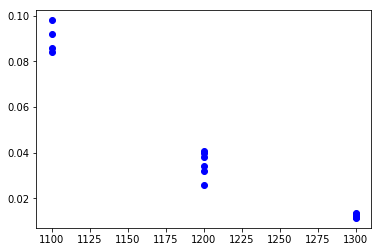

In [7]:
plt.plot(x1, x3, 'bo')

In [8]:
Xn = np.vstack([x1n, x2n, x3n, x1n*x2n, x1n*x3n, x2n*x3n, x1n**2, x2n**2, x3n**2])
# Xn = np.vstack([x1n, x2n, x3n, x1n*x2n, x2n*x3n])

In [9]:
model = pm.Model()
with model:
    alpha = pm.Flat('alpha')
    # alpha = pm.Normal('alpha', mu=0, sd=10)
    
    # tau = pm.HalfNormal('tau', sd=1)
    # tau = pm.HalfStudentT('tau', nu=4, sd=1)
    
    # xi  = pm.Bernoulli('xi', 0.5, shape=Xn.shape[0])
    
    nu = pm.Gamma('nu', alpha=2, beta=0.1)
    
    # beta  = pm.Flat('beta', shape=Xn.shape[0])
    # beta  = pm.Normal('beta', mu=0, sd=1, shape=Xn.shape[0])
    # beta  = pm.Normal('beta', mu=0, sd=tau, shape=Xn.shape[0])
    # beta  = pm.Cauchy('beta', alpha=0, beta=1, shape=Xn.shape[0])
    beta  = pm.StudentT('beta', nu=nu, mu=0, sd=1, shape=Xn.shape[0])
    
    # bb = pm.Deterministic('bb', xi * beta)
    
    sigma = pm.HalfNormal('sigma', sd=1)
    # sigma = pm.HalfCauchy('sigma', beta=1)
    # sigma = pm.HalfFlat('sigma')
    
    mu    = alpha + pm.math.dot(beta, Xn)
    # mu    = alpha + pm.math.dot(bb, Xn)
    
    y     = pm.Normal('y', mu=mu, sd=sigma, observed=yobs)
    # y     = pm.Normal('y', mu=mu, sd=1, observed=yobs)

In [10]:
with model:
    trace = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, beta, nu, alpha]
Sampling 4 chains: 100%|██████████| 6000/6000 [00:08<00:00, 721.93draws/s] 
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
There were 11 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8901633983453701, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


In [11]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
alpha,36.288861,1.121067,0.030686,34.043480,38.385593,1186.163652,1.000773
beta__0,10.668735,1.787550,0.057961,7.261300,13.714848,772.081993,1.000637
beta__1,1.367898,0.541235,0.010126,0.197636,2.352083,2452.515743,1.000887
beta__2,-0.789656,2.031163,0.068073,-5.022234,2.399034,707.161039,1.001105
beta__3,-2.774470,2.399248,0.095384,-8.206215,0.497062,557.921092,1.002409
beta__4,0.021674,1.140172,0.022635,-2.190755,2.174981,2064.726211,1.000340
beta__5,-1.443803,2.503324,0.100595,-7.273266,1.858134,552.552665,1.002475
beta__6,-0.144304,1.023804,0.017870,-2.307197,1.788457,2903.103857,0.999860
beta__7,-0.552366,0.479391,0.010017,-1.463793,0.440888,2262.846302,0.999987
beta__8,0.177839,0.997502,0.020677,-1.703432,2.343421,2131.171737,0.999797


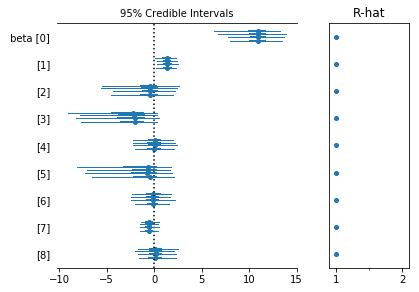

In [12]:
pm.forestplot(trace, varnames=['beta']);
#pm.traceplot(trace);

In [13]:
#pm.plot_posterior(trace);

In [14]:
nppc = 100
ppc  = pm.sample_posterior_predictive(trace, samples=nppc, model=model)

100%|██████████| 100/100 [00:00<00:00, 1058.62it/s]


In [15]:
ppc['y'].shape

(100, 16)

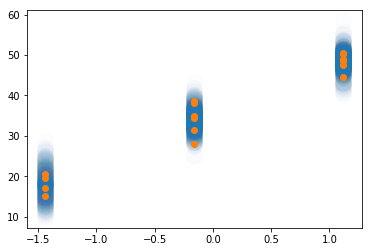

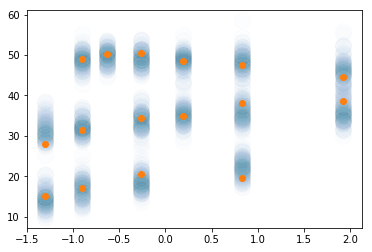

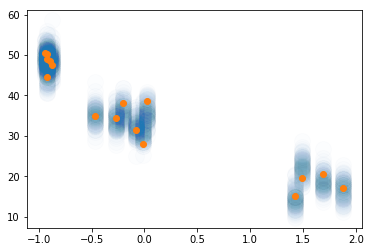

In [16]:
plt.scatter(np.tile(x1n, (nppc, 1)), ppc['y'], alpha=0.01, s=250)
plt.scatter(x1n, yobs)
plt.show()

plt.scatter(np.tile(x2n, (nppc, 1)), ppc['y'], alpha=0.01, s=250)
plt.scatter(x2n, yobs)
plt.show()

plt.scatter(np.tile(x3n, (nppc, 1)), ppc['y'], alpha=0.01, s=250)
plt.scatter(x3n, yobs)
plt.show()

In [17]:
print(pm.waic(trace, model=model))

WAIC_r(WAIC=77.18126421850332, WAIC_se=6.733447393225133, p_WAIC=7.906350450303482, var_warn=1)


/Users/bara947/.local/intelpython3/envs/u18fest_env/lib/python3.6/site-packages/pymc3/stats.py:218: UserWarning: For one or more samples the posterior variance of the
        log predictive densities exceeds 0.4. This could be indication of
        WAIC starting to fail see http://arxiv.org/abs/1507.04544 for details
        
  """)


In [18]:
xe1 = 1300
xe2 = 7.5
xe3 = 0.098
xen1 = (xe1 - x1.mean()) / x1.std()
xen2 = (xe2 - x2.mean()) / x2.std()
xen3 = (xe3 - x3.mean()) / x3.std()

Xen  = np.vstack([xen1, xen2, xen3, xen1*xen2, xen1*xen3, xen2*xen3, xen1**2, xen2**2, xen3**2])
# Xen  = np.vstack([xen1, xen2, xen3, xen1*xen2, xen2*xen3])

In [19]:
ye = np.zeros(100)
for i in range(100):
    ye[i] = trace['alpha'][i] + np.dot(trace['beta'][i], Xen)

(0, 100)

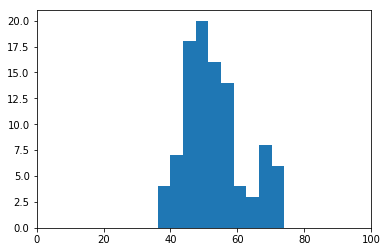

In [20]:
plt.hist(ye)
plt.xlim([0, 100])